###  Project :  Twitter Data Sentiment Analysis 

In [1]:
# Import Libraries

import nltk

# Data Cleaning 
import re
import advertools as adv
from string import punctuation

# Data Exploration 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Model Development 
import random
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Model Evaluation 
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Download nltk corpus

nltk.download('twitter_samples')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [3]:
# Load Data 
nltk.corpus.twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [4]:
positive = [i         for i in nltk.corpus.twitter_samples.strings('positive_tweets.json') ]
negative = [i         for i in nltk.corpus.twitter_samples.strings('negative_tweets.json') ]

In [5]:
len(positive), len(negative)

(5000, 5000)

In [6]:
# Collect tweets with labels.        p : positive    n : negative 

labeled_tweets = [ (i, 'p')   for i in positive] + [(j, 'n')     for j in negative]

In [7]:
labeled_tweets[100]

("@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D",
 'p')

In [8]:
# Shuffle Data 

random.shuffle(labeled_tweets )

In [9]:
# Divide Data into Training and testing 

test  = labeled_tweets[ : 1000]      # First 1000 Tweets for Testing 
train = labeled_tweets[ 1000 : ]     # 1000 index onwards for training

In [10]:
len(test), len(train)

(1000, 9000)

####  Data Cleaning : 

In [11]:
train[500]

('I really am a code monkey :( http://t.co/5vFYrLeeux', 'n')

In [12]:
str1 = '💁 People 🐻🌻 Animals 🍔🍹 Food 🎷⚽️ Activities 🌇 Travel 💡🎉 Objects 💖🔣 Symbols 🎌🏳️‍🌈 Flags'

In [13]:
str1

'💁 People 🐻🌻 Animals 🍔🍹 Food 🎷⚽️ Activities 🌇 Travel 💡🎉 Objects 💖🔣 Symbols 🎌🏳️\u200d🌈 Flags'

In [14]:
# Function to handle emojis

def handling_emoji(str1) :
    emoji_pattern = re.compile("["
               u"\U0001F600-\U0001F64F"   # emoticons
               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)          
               "]", flags=re.UNICODE)

    text = emoji_pattern.sub('', str1)
    return text

In [15]:
#  Remove Punctuations :

def removePunct(str1) : 
    pat = re.compile('[A-Za-z][{}]+'.format(punctuation))
    txt = re.findall(pat, str1)
    if len(txt) > 0 : 
        for i in txt : 
            str1 = str1.replace(i[-1] , '' )
        return str1
    else : 
        return str1


In [16]:
# Remove Mentions     [@abc123]

def removeMentions(str1) : 
    return re.sub('@[A-Za-z0-9_]+', '', str1 )

In [39]:
# Remove word 'RT' and symbol '#'

def removeSymbols(tweet):
    tweet = re.sub('#', '',tweet)  # removed "#"" symbol
    tweet = re.sub('RT[\s]+', '',tweet) # rmoved RT
    return tweet


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Abhijit\AppData\Local\Temp\ipykernel_7608\2916679413.py:5: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub('RT[\s]+', '',tweet) # rmoved RT


In [40]:
# Remove Stopwords 

stopwords = nltk.corpus.stopwords.words('english')
def removeStopWords(token) : 
    return [i.lower()          for i in token       if i.lower() not in stopwords ]

In [41]:
# Function to remove hyperlink/urls:

def removeLinks(tweet):
    pat = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.sub(pat,'', tweet)

<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
C:\Users\Abhijit\AppData\Local\Temp\ipykernel_7608\424554998.py:4: SyntaxWarning: invalid escape sequence '\('
  pat = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'


In [42]:
# Create a Common grand function to clean tweets.

def data_cleaning(tweet) :
    tweet = handling_emoji(tweet)
    tweet = removeLinks(tweet)
    tweet = removeMentions(tweet)
    token = removePunct(tweet).split()
    token = removeStopWords(token)
    tweet = ' '.join(token)
    tweet = removeSymbols(tweet)            # '#' and 'RT'
    tweet = re.sub('0-9', '', tweet)        # remove Digits 
    return tweet

In [43]:
data_cleaning(train[100][0])

'ill add fics tomorrow :d'

In [44]:
train[100][0]

"i'll add more fics tomorrow :D"

In [45]:
# Clean Training Data 

In [46]:
train_clean = []
c = 0 

for tweet, lab in train : 
    tweet = data_cleaning(tweet)
    
    if len(tweet) > 0 : 
        train_clean.append((tweet, lab))
    else : 
        c = c + 1       # To count empty tweets after cleaning 


In [47]:
print(train_clean[:3])

[('time jhalak boring concept bakwas old concept much better interesting :-(:-(:-(', 'n'), ('every time visit court notice something funny slice lifeso many stories hidden untapped :)', 'p'), ('funny intelligent strong funny funny :-)', 'p')]


In [48]:
# Distribution of 'Pos' , 'Neg' tags in training dataset.

df1 = pd.DataFrame(train_clean, columns=['Tweet', 'Label'])

In [49]:
df1['Label'].value_counts()

Label
p    4510
n    4490
Name: count, dtype: int64

<Axes: ylabel='count'>

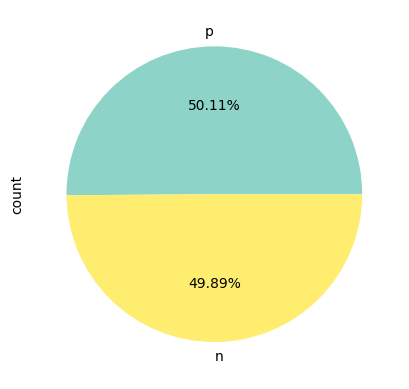

In [50]:
df1['Label'].value_counts().plot.pie(cmap='Set3', autopct= "%.2f%%")

In [51]:
# Separate Positive and Negative Tweets from  train_clean

pos = [i     for i,j  in train_clean     if j == 'p']
neg = [i     for i,j  in train_clean     if j == 'n']

In [52]:
len(pos), len(neg)

(4510, 4490)

In [53]:
# Vusually Analyze positive and negative using wordcloud.

In [54]:
pos[0]

'every time visit court notice something funny slice lifeso many stories hidden untapped :)'

In [58]:
re.sub('[":)"]', '',    'yeah :) ikr like pic' )

'yeah  ikr like pic'

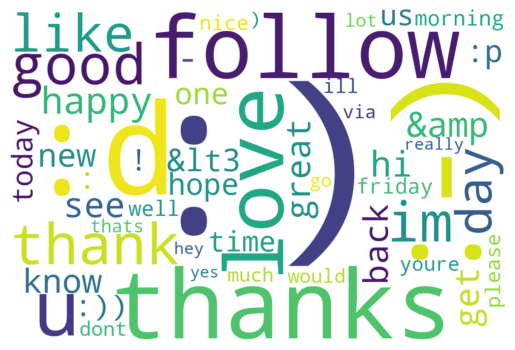

In [59]:
positive_word_Freq = nltk.FreqDist(' '.join(pos).split())     # Freaquency generator 

# wordcloud generation 
wordcloud_pos = WordCloud(width=1200, height=800, background_color='white', colormap='viridis', max_words= 50 )
wc_pos = wordcloud_pos.generate_from_frequencies(positive_word_Freq)

plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

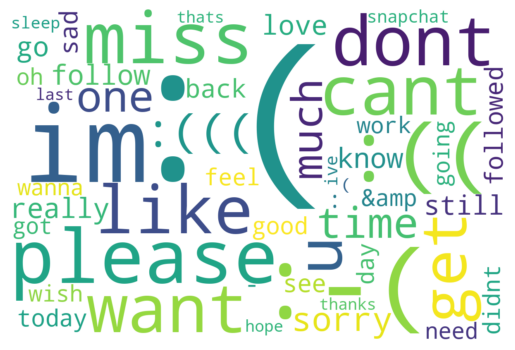

In [60]:
negative_word_Freq = nltk.FreqDist(' '.join(neg).split())     # Freaquency generator 

# wordcloud generation 
wordcloud_neg = WordCloud(width=1200, height=800, background_color='white', colormap='viridis', max_words= 50 )
wc_neg = wordcloud_pos.generate_from_frequencies(negative_word_Freq)

plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
# Create Vocab using tweets to generate features 

In [62]:
strings = [ i     for i, j in train_clean]
words   = ' '.join(strings).split()

In [63]:
print(" Word Length : ", len(words))

 Word Length :  61247


In [64]:
unique_words = set(words)
print(" Unique Words : ", len(set(words)) )

 Unique Words :  12354


In [65]:
# Extract Features from words 

In [66]:
def feature_extract(tweet) : 
    return { f"contains_{i}" :   int(i in  tweet )      for i in  unique_words }

In [67]:
# Extract features for training dataset

train_features = [ (feature_extract(t) , l )             for t, l in train_clean]

In [68]:
# Model Development 

In [ ]:
# Train Model 

clf = nltk.NaiveBayesClassifier.train(train_features)

In [ ]:
# Evaluate 

nltk.classify.accuracy(clf, train_features)

In [ ]:
# Checking with a sample Tweet

tw = 'Billie :-)  But what happened to his arm???'

tw_clean = data_cleaning(tw)
sample_features = feature_extract(tw_clean)

# Prediction 
clf.classify(sample_features)

In [ ]:
test[1]